('Original Image Shape', (520, 696, 3))


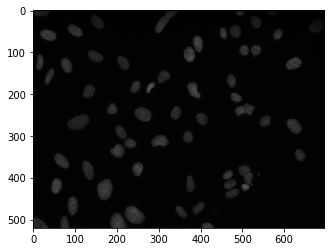

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import cv2

training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[45]

img_org = cv2.imread(str(im_path))
plt.imshow(img_org)
print('Original Image Shape',img_org.shape)

('Formatted Image Shape', (256, 256))


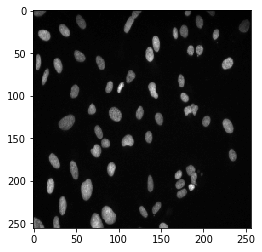

In [38]:
def format_img(img):
    desiredShape = (256,256)
    img_res = cv2.resize(img,desiredShape)
    img_gry = cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)
    return img_gry

img_formatted = format_img(img_org)
plt.imshow(img_formatted,cmap='gray')
print('Formatted Image Shape',img_formatted.shape)

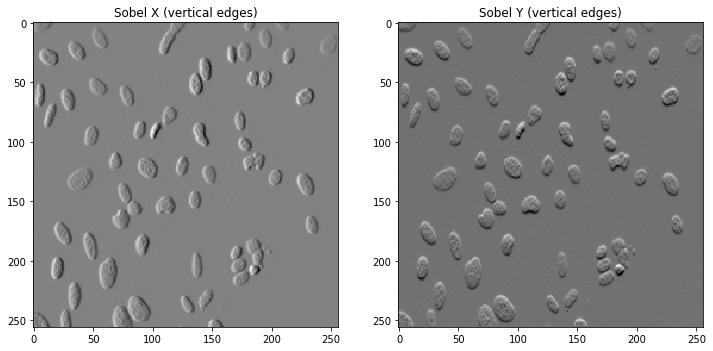

In [78]:
im = np.float32(img_formatted) / 255.0

# Calculate gradient 
gx = cv2.Sobel(img_formatted, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img_formatted, cv2.CV_32F, 0, 1, ksize=1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gx,cmap='gray')
plt.title('Sobel X (vertical edges)')
plt.subplot(1,2,2)
plt.imshow(gy,cmap='gray')
plt.title('Sobel Y (vertical edges)')

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

Text(0.5,1,u'Canny Edge Detection')

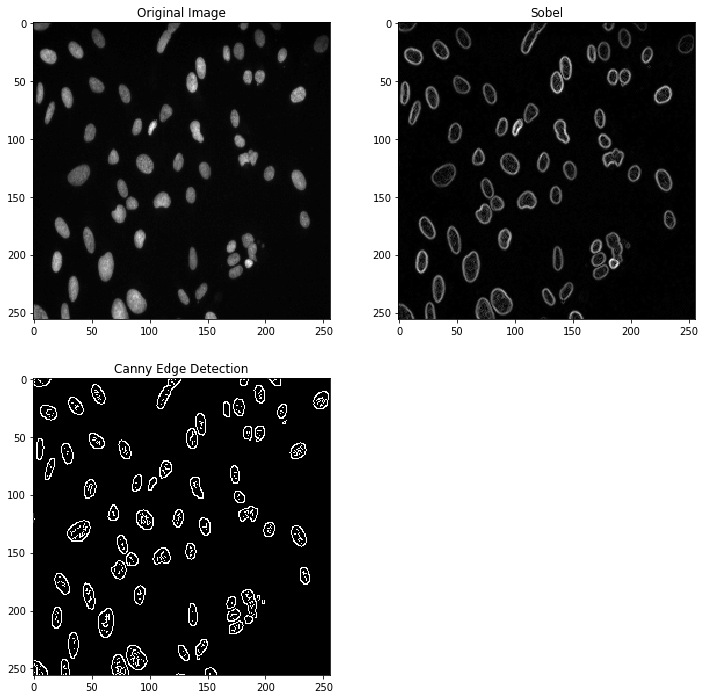

In [90]:
sb = np.sqrt(np.square(gx) + np.square(gy))
canny = cv2.Canny(img_formatted,0,21)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_formatted,cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(sb,cmap='gray')
plt.title('Sobel')
plt.subplot(2,2,3)
plt.imshow(canny,cmap='gray')
plt.title('Canny Edge Detection')

3964


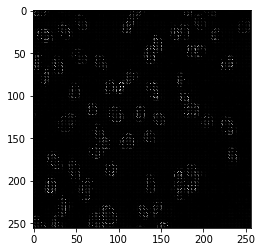

In [95]:
from skimage.feature import hog

fd, hog_image = hog(img_formatted, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualise=True)

hog_image_scl = exposure.rescale_intensity(hog_image, in_ranges(2,10))

plt.imshow(hog_image,cmap='gray')